In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
# CMS Raa vs. pT data for 0-5% most central Pb-Pb ([arXiv:1611.01664](http://arxiv.org/abs/arXiv:1611.01664)) available on [hepdata](http://www.hepdata.net/record/ins1496050?version=1&table=Table8). Read data as comma separated values:

In [11]:
#download pt, Raa and Raa statistical errors
pt, Raa, RaaStatErr = np.loadtxt('C:/Users/rossy/Downloads/HEPData-ins1496050-v1-Table_8.csv', delimiter=',', usecols=(0,3,4), unpack=True, dtype=float, skiprows=14)

In [35]:
n = 8 #given in the lecture

#functional dependence of Raa on pt
def f(x, delta):
    return (1 + delta/x)**(n-2)


pt_min = 25 #minimum value of pT for the fit
pt_max = max(pt) #minimum value of pT for the fit

#cut for the given pt limits
cut = (pt >= pt_min) & (pt <= pt_max)
cut_pt = pt[cut]
cut_Raa = Raa[cut]
cut_RaaStatErr = RaaStatErr[cut]

#initial guess of delta
delta_0 = 1

value of delta fitted: [-4.49495918]
error on delta: [[0.00112485]]


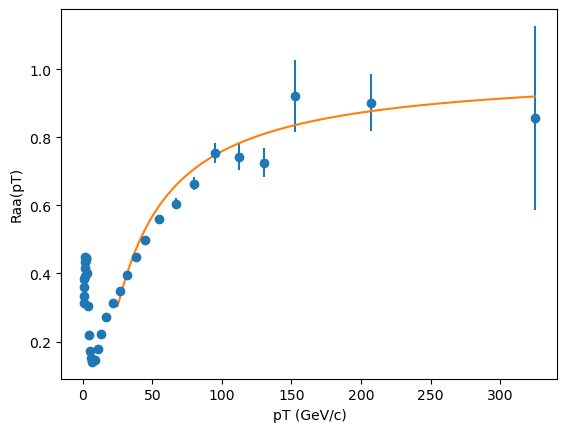

In [36]:
# Perform the fit
delta_value, delta_err = curve_fit(f, cut_pt, cut_Raa, sigma=cut_RaaStatErr, p0=delta_0, absolute_sigma=True)

#define x and y for the plotting
x = np.linspace(pt_min, pt_max, 100)
y = f(x, delta_value)

plt.xlabel('pT (GeV/c)')
plt.ylabel('Raa(pT)')

#plot the data
plt.errorbar(pt, Raa, yerr=RaaStatErr, fmt='o')

# Plot the function f
plt.plot(x, y, label='f(x)')

#printe the values of delta and its error
print("value of delta fitted:", delta_value)
print("error on delta:", delta_err)